In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px

In [11]:
from sklearn.datasets import load_breast_cancer

In [24]:
data = load_breast_cancer(as_frame=True)
df = data['data']
df['target'] = data['target']

In [27]:
df.shape

(569, 31)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: >

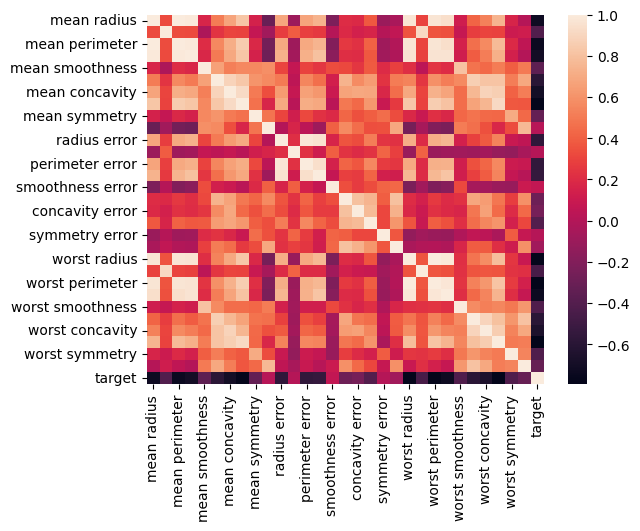

In [30]:
sns.heatmap(df.corr())

In [347]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df.drop(columns=['target']).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [46]:
vif_scores = pd.DataFrame(vif, columns=['vif'])
vif_scores['columns'] = df.drop(columns=['target']).columns

In [48]:
vif_scores.sort_values(by='vif')

,vif,columns
11,24.884666,texture error
19,27.291976,fractal dimension error
14,31.444949,smoothness error
16,32.022178,concavity error
15,39.250442,compactness error
18,40.944507,symmetry error
17,50.520998,concave points error
13,77.303826,area error
26,90.370980,worst concavity
27,144.604054,worst concave points


In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

axis_ = pca.fit_transform(X_train)

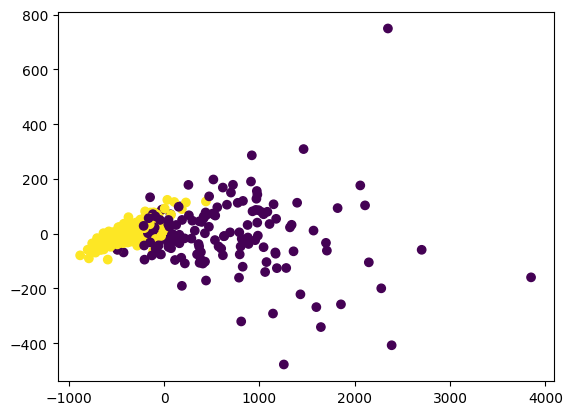

In [142]:
# px.scatter_3d(pd.DataFrame(axis_), 0, 1, 2, color=y_train)
plt.scatter(axis_[:, 0], axis_[:, 1], c=y_train)

In [58]:
df['target'].value_counts() / df.shape[0]

target
1    0.627417
0    0.372583
Name: count, dtype: float64

In [150]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.linear_model import LogisticRegression

In [182]:
from sklearn.pipeline import Pipeline
clf_pipe = Pipeline([
    ("pca", PCA(n_components=21)),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

In [183]:
clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=21)), ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [184]:
y_pred_ = clf_pipe.predict(X_test)
accuracy_score(y_test, y_pred_)

0.9707602339181286

In [185]:
np.mean(cross_val_score(clf_pipe, X, y, cv=10, scoring='recall'))

0.9887301587301588

In [162]:
scores = []
for i in range(2, 29):
    clf_pipe = Pipeline([
        ("pca", PCA(n_components=i)),
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ])

    clf_pipe.fit(X_train, y_train)
    score = np.mean(cross_val_score(clf_pipe, X, y, cv=10, scoring='recall'))
    scores.append(score)
    # print("cross validate : ", score)

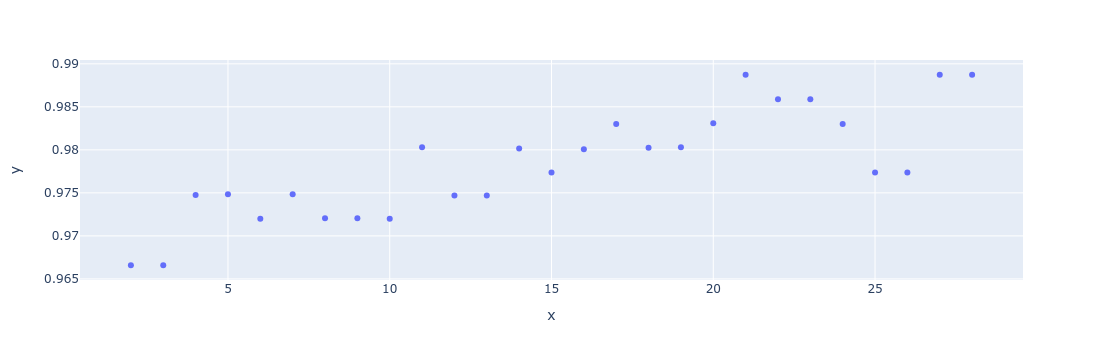

In [163]:
px.scatter(x=range(2, 29), y=scores)

In [203]:
pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.982456,0.964912,0.97076,0.973684,0.971068
recall,0.933333,0.990991,0.97076,0.962162,0.970760
f1-score,0.957265,0.977778,0.97076,0.967521,0.970580
support,60.000000,111.000000,0.97076,171.000000,171.000000


In [210]:
confusion_matrix(y_test, y_pred_)

array([[ 56,   4],
       [  1, 110]])

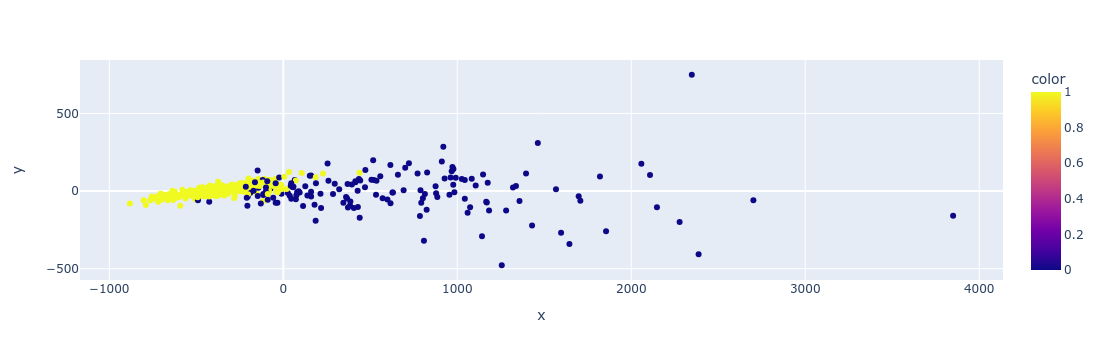

In [209]:
px.scatter(x=x_, y=y_, color=y_train)

In [212]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)

In [228]:
dt_pipe = Pipeline([
    ("pca", PCA(n_components=5)),
    ("model", dt)
])

dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('model', DecisionTreeClassifier(max_depth=3))])

In [229]:
y_pred_ = dt_pipe.predict(X_test)

In [230]:
pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.913793,0.938053,0.929825,0.925923,0.929541
recall,0.883333,0.954955,0.929825,0.919144,0.929825
f1-score,0.898305,0.946429,0.929825,0.922367,0.929543
support,60.000000,111.000000,0.929825,171.000000,171.000000


In [226]:
scores = []
for i in range(2, 29):
    clf_pipe = Pipeline([
        ("pca", PCA(n_components=i)),
        ("model", DecisionTreeClassifier(max_depth=3))
    ])

    clf_pipe.fit(X_train, y_train)
    score = np.mean(cross_val_score(clf_pipe, X, y, cv=10, scoring='recall'))
    scores.append(score)
    # print("cross validate : ", score)

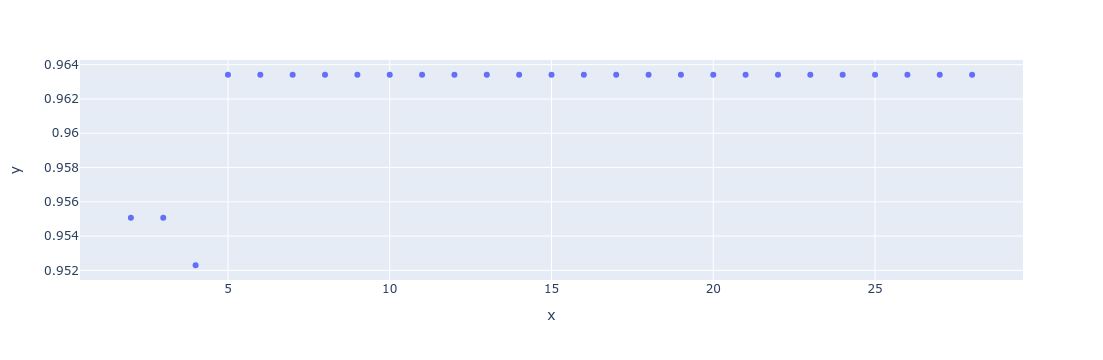

In [227]:
px.scatter(x=range(2, 29), y=scores)

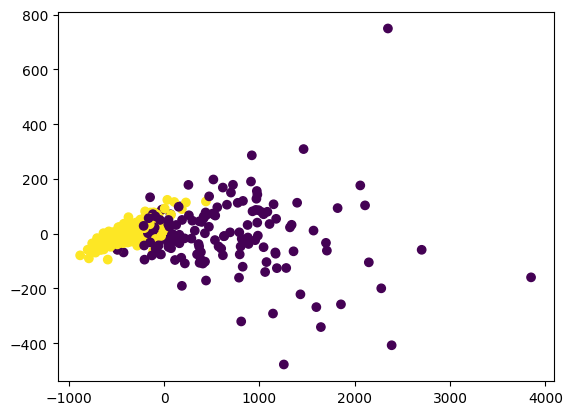

In [235]:
plt.scatter(axis_[:, 0], axis_[:, 1], c=y_train)

In [238]:
from mlxtend.plotting import plot_decision_regions
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(axis_[:, 0:2], y_train)

DecisionTreeClassifier(max_depth=3)

<Axes: >

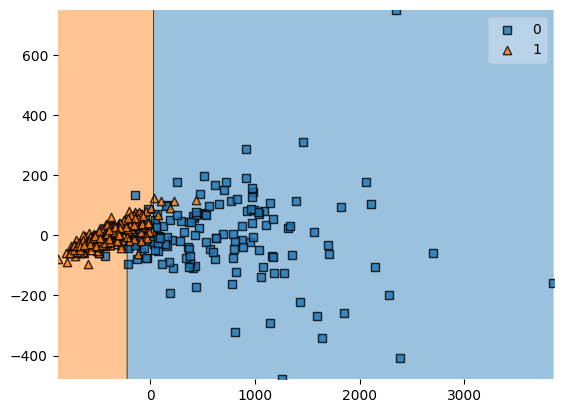

In [239]:
plot_decision_regions(axis_[:, 0:2], y_train, dt)

In [250]:
fi = DecisionTreeClassifier(max_depth=3)
fi.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [253]:
pd.DataFrame(classification_report(y_test, fi.predict(X_test), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.931034,0.946903,0.94152,0.938969,0.941335
recall,0.900000,0.963964,0.94152,0.931982,0.941520
f1-score,0.915254,0.955357,0.94152,0.935306,0.941286
support,60.000000,111.000000,0.94152,171.000000,171.000000


In [275]:
feature_imp = pd.DataFrame()
feature_imp['columns'] = df.drop(columns=['target']).columns
feature_imp['score'] = fi.feature_importances_

In [279]:
feature_imp.sort_values(by='score', ascending=False)

,columns,score
22,worst perimeter,0.806661
27,worst concave points,0.112617
23,worst area,0.059327
12,perimeter error,0.011629
0,mean radius,0.009766
16,concavity error,0.000000
28,worst symmetry,0.000000
26,worst concavity,0.000000
25,worst compactness,0.000000
24,worst smoothness,0.000000


In [284]:
df[['worst perimeter', 'worst concave points']]

,worst perimeter,worst concave points
0,184.60,0.2654
1,158.80,0.1860
2,152.50,0.2430
3,98.87,0.2575
4,152.20,0.1625
...,...,...
564,166.10,0.2216
565,155.00,0.1628
566,126.70,0.1418
567,184.60,0.2650


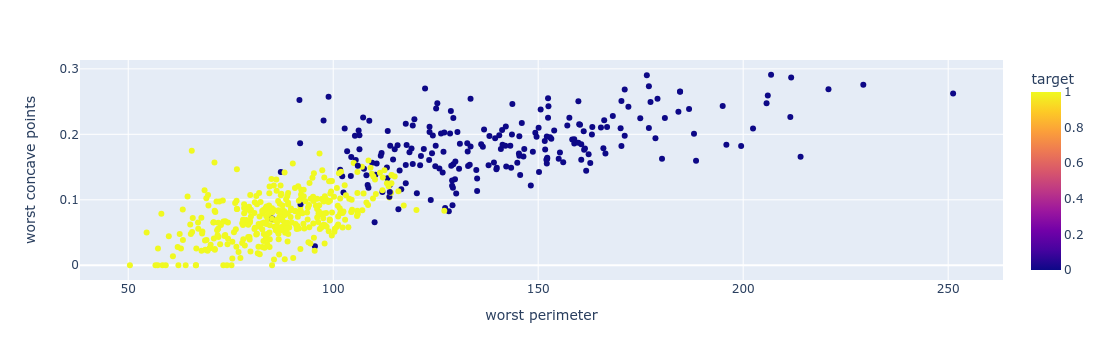

In [287]:
px.scatter(df, x='worst perimeter', y='worst concave points', color='target')

In [300]:
X = df[['worst perimeter', 'worst concave points']].values
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [306]:
from sklearn.preprocessing import PolynomialFeatures

In [329]:
lr = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("lr", LogisticRegression(max_iter=5000))
])

In [330]:
lr.fit(X_train, y_train)
y_pred_ = lr.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred_, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.954545,0.961905,0.959064,0.958225,0.959021
recall,0.940299,0.971154,0.959064,0.955726,0.959064
f1-score,0.947368,0.966507,0.959064,0.956938,0.959008
support,67.000000,104.000000,0.959064,171.000000,171.000000


In [331]:
np.mean(cross_val_score(lr, X, y, cv=10, scoring='recall'))

0.9580158730158731

<Axes: >

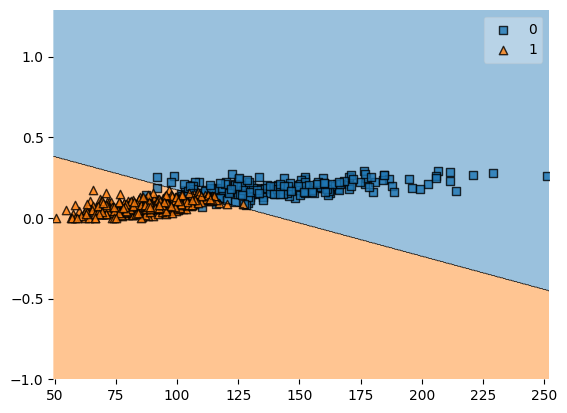

In [332]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.values, lr)

<Axes: >

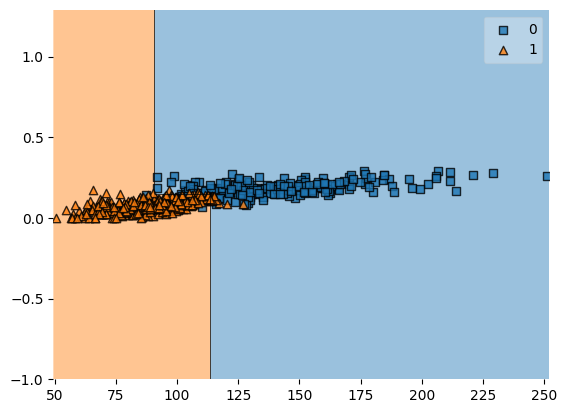

In [342]:
dt = Pipeline([
    ("poly", PolynomialFeatures(degree=1)),
    ("dt", DecisionTreeClassifier(max_depth=3))
])

dt.fit(X_train, y_train)
plot_decision_regions(X, y.values, dt)

In [349]:
from sklearn.linear_model import Lasso

In [380]:
lasso = Lasso(max_iter=1000, alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [381]:
lasso.coef_

array([ 0.        ,  0.00191861, -0.        ,  0.00035672, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.00795611, -0.00084896, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.09855323, -0.01556354, -0.01085817,  0.0007537 , -0.        ,
       -0.        , -0.01513579, -0.        , -0.        , -0.        ])

In [382]:
feature_imp['lasso_score'] = lasso.coef_

<Axes: xlabel='columns'>

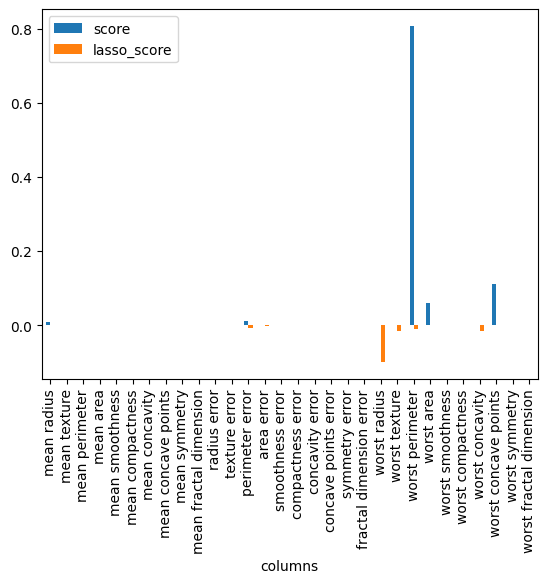

In [383]:
feature_imp.plot(kind='bar', x='columns')

In [384]:
feature_imp[feature_imp['score'] != 0]

,columns,score,lasso_score
0,mean radius,0.009766,0.000000
12,perimeter error,0.011629,-0.007956
22,worst perimeter,0.806661,-0.010858
23,worst area,0.059327,0.000754
27,worst concave points,0.112617,-0.000000


In [385]:
feature_imp

,columns,score,lasso_score
0,mean radius,0.009766,0.000000
1,mean texture,0.000000,0.001919
2,mean perimeter,0.000000,-0.000000
3,mean area,0.000000,0.000357
4,mean smoothness,0.000000,-0.000000
5,mean compactness,0.000000,-0.000000
6,mean concavity,0.000000,-0.000000
7,mean concave points,0.000000,-0.000000
8,mean symmetry,0.000000,-0.000000
9,mean fractal dimension,0.000000,-0.000000


In [386]:
df[['worst perimeter', 'worst area']].corr()

,worst perimeter,worst area
worst perimeter,1.000000,0.977578
worst area,0.977578,1.000000
